## Covid 19 Analysis

### Problem Statement

To check whether there is any relation between corona virus spread over the world and world happiness report.

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the  covid dataset
df = pd.read_csv("C:\Vikram\Data Science\Covid 19 Analysis\covid19_Confirmed_dataset.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Brief Summary

The given data contains corona virus confirmed cases on until the mentioned dates for different countries. The 'Province/State' denotes the State in which the covid cases were registered, 'Lat" represents Latitude while	'Long' represents Logitude.

We are interest to analyse confirmed covid cases countrywise, so we will remove the variables 'Province/State', 'Lat' and 'Long' from the data.

In [3]:
# Remove unncessary variables
df1  = df.drop(['Province/State', 'Lat', 'Long',], axis=1)
df1.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


We will group the confirmed covid cases country-wise by using **groupby** command.

In [4]:
# Group the data by Country column
df2 = df1.groupby('Country/Region').sum()
df2.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [5]:
len(df2.index)

187

This gives we have data on confirmed covid cases for **187** countries from 22nd Jan 2020 to 30th Apr 2020. Let us plot data for covid confirmed cases for few countries.

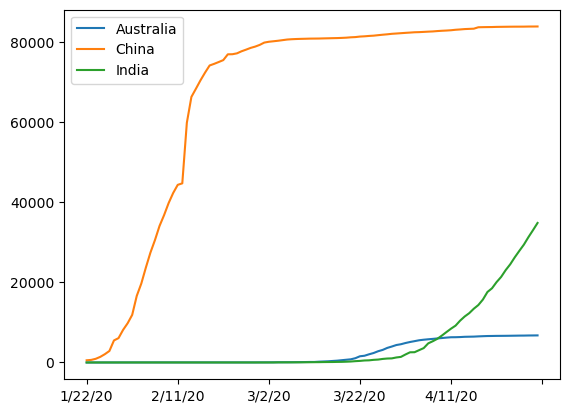

In [6]:
df2.loc['Australia'].plot()
df2.loc['China'].plot()
df2.loc['India'].plot()
plt.legend()
plt.show()

Let us now count number of covide cases recorded on a daily basis. This can be achieved by taking differences of confirmed covid cases until the date.

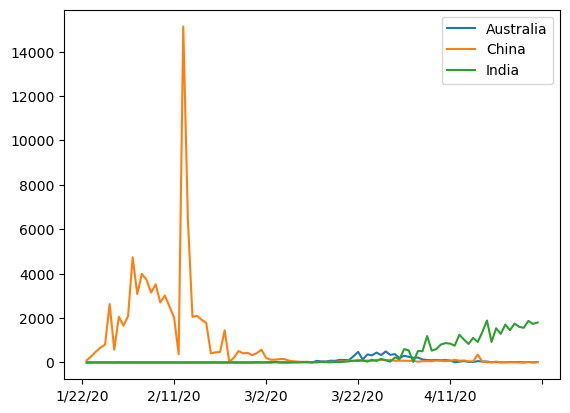

In [7]:
df2.loc['Australia'].diff().plot()
df2.loc['China'].diff().plot()
df2.loc['India'].diff().plot()
plt.legend()
plt.show()

It is not practically possible or not intuitive to visualize the graphs for number of covid cases recorded on daily bases for all the **187** countries. So we will consider the maximum number of covid cases recorded on a specific daya for all the **187** countries.

In [8]:
m1 = df2.loc['Australia'].diff().max()
m2 = df2.loc['China'].diff().max()
m3 = df2.loc['India'].diff().max()

print("The maximum number of covid cases recorded for Australia on a specific day is, ", m1)
print("The maximum number of covid cases recorded for China on a specific day is, ", m2)
print("The maximum number of covid cases recorded for India on a specific day is, ", m3)

The maximum number of covid cases recorded for Australia on a specific day is,  497.0
The maximum number of covid cases recorded for China on a specific day is,  15136.0
The maximum number of covid cases recorded for India on a specific day is,  1893.0


It is a time consuming work to find the maximum of number of covid cases for all the **187** countries one by one. So we will use following method.

In [9]:
countries = list(df2.index)
countries[:5]

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']

In [10]:
max_covid_cases = []
for c in countries:
    max_covid_cases.append(df2.loc[c].diff().max())

df2['Max_Covid_Cases'] = max_covid_cases
df2.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_Covid_Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


Now let us import the world happiness data for further analysis.

In [11]:
wwhi = pd.read_csv("C:\Vikram\Data Science\Covid 19 Analysis\worldwide_happiness_report.csv")
wwhi.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [12]:
wwhi.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Our task was to check if there is any relation between corona virus spread over the world and world happiness indices. Therefore, in the above data the variables 'Country or region', 'GDP per capita', 'Social support', 'Healthy life expectancy', and 'Freedom to make life choices' are the only variables of our interest.

So we will keep only these variables and will remove rest of the variables from the data.

In [13]:
wwhi = wwhi[['Country or region', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']]
wwhi.set_index(['Country or region'], inplace = True)
wwhi.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


Now it is time to combine two datasets, namely, confirmed covid cases data and world happiness data to get meaningful inights.

In [14]:
merged_data = df2.join(wwhi, how = "inner")
merged_data.shape

(143, 105)

In [15]:
merged_data.columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '4/26/20', '4/27/20', '4/28/20', '4/29/20', '4/30/20',
       'Max_Covid_Cases', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices'],
      dtype='object', length=105)

In [16]:
final_data = merged_data[['Max_Covid_Cases', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']]
final_data.head()

,Max_Covid_Cases,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [17]:
final_data.columns

Index(['Max_Covid_Cases', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices'],
      dtype='object')

Let us now plot the heatmap for the correlation matrix for the final data set to check which variables are significantly correlarted.

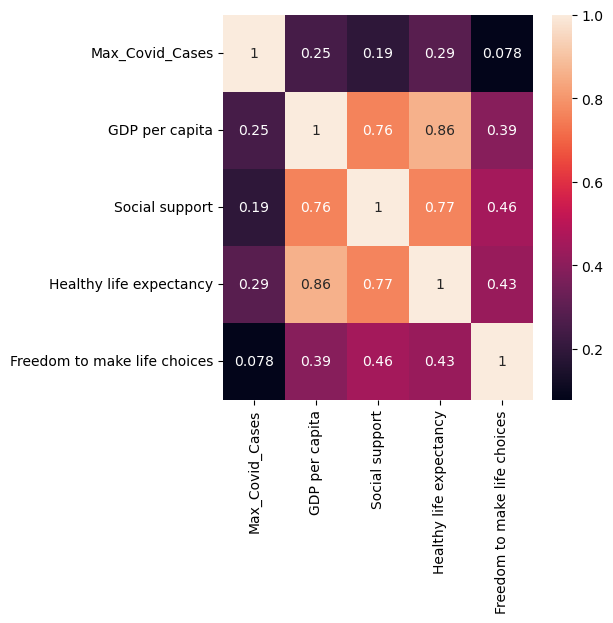

In [18]:
plt.figure(figsize = (5,5))
sns.heatmap(final_data.corr(), annot=True)
plt.show()

The above heatmap shows that, none of the variables 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices' are significantly corrleated with the variable 'Maximum Covid Cases'.

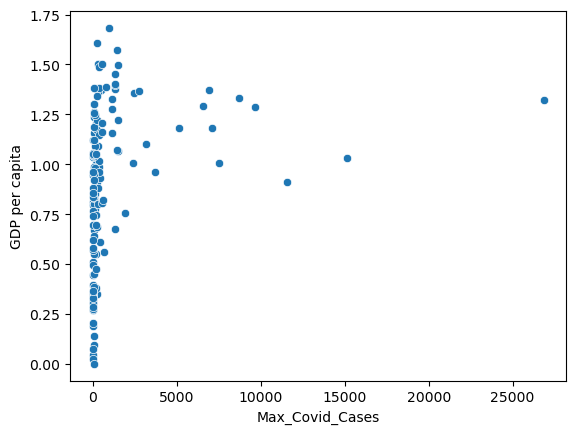

In [19]:
sns.scatterplot(x='Max_Covid_Cases', y='GDP per capita', data= final_data)
plt.show()

The above scatter plot is NOT a clear graph as the variable 'Max_Covid_Cases' takes high values compared to rest of the variables. So we will modify the variable 'Max_Covid_Cases' by taking its logarithm.

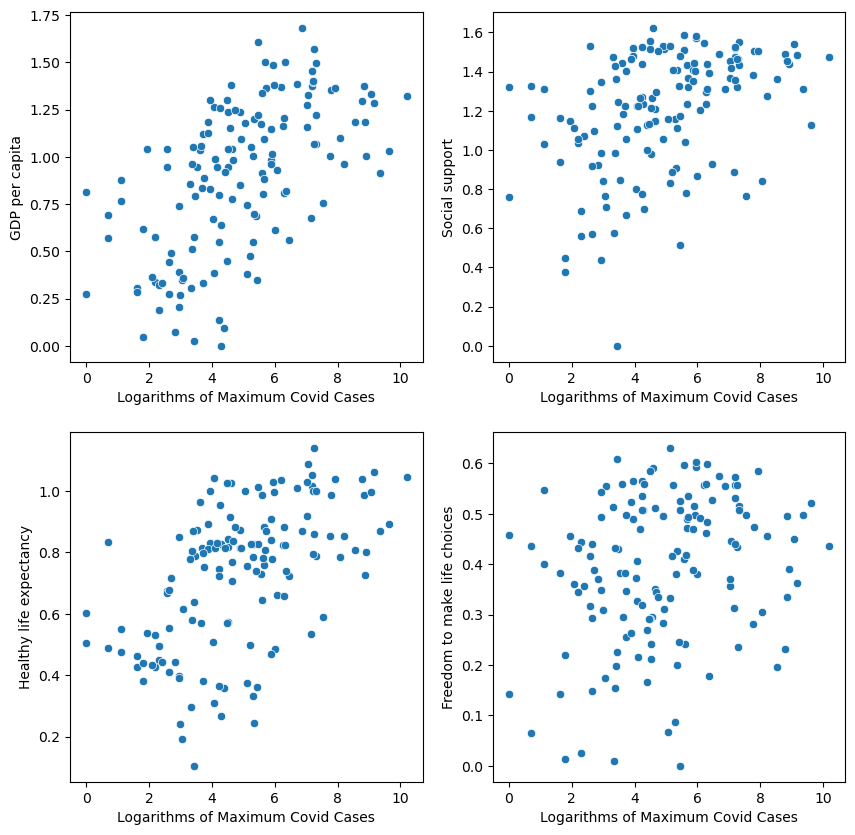

In [20]:
import numpy as np
log_max_covid_cases = np.log(final_data['Max_Covid_Cases'])

plt.figure(figsize=(10,10))

# Plot 1:
plt.subplot(2,2,1)
sns.scatterplot(x=log_max_covid_cases, y= 'GDP per capita', data= final_data)
plt.xlabel('Logarithms of Maximum Covid Cases')
plt.ylabel('GDP per capita')

# Plot 2:
plt.subplot(2,2,2)
sns.scatterplot(x=log_max_covid_cases, y= 'Social support', data= final_data)
plt.xlabel('Logarithms of Maximum Covid Cases')
plt.ylabel('Social support')

# Plot 3:
plt.subplot(2,2,3)
sns.scatterplot(x=log_max_covid_cases, y= 'Healthy life expectancy', data= final_data)
plt.xlabel('Logarithms of Maximum Covid Cases')
plt.ylabel('Healthy life expectancy')

# Plot 4:
plt.subplot(2,2,4)
sns.scatterplot(x=log_max_covid_cases, y= 'Freedom to make life choices', data= final_data)
plt.xlabel('Logarithms of Maximum Covid Cases')
plt.ylabel('Freedom to make life choices')
plt.show()

The above scatter plots show that there is a positive linear relationship between 'Maximum Covid Cases' and 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices'. Also, we can see that the points are scattered which indicates that the extent of linear relationship is poor.

### Conclusion:

There is not a significant relationship between corona virus spread over the world and world happiness report.